# Naive Bayes approach

In [33]:
%matplotlib inline
import common

import numpy as np
import sklearn.dummy
import sklearn.naive_bayes

In [7]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('full', 'count', None)
baseline_classifier = sklearn.dummy.DummyClassifier()
baseline_classifier.fit(train_as_vec, train_targets)

/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/asgavar/.local/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


SCORE: 0.19968359139446654
[[0.0606223  0.05801982 0.12189521 0.22580275 0.53365992]
 [0.06178963 0.06011014 0.11553334 0.22778581 0.53478108]
 [0.0611196  0.06020677 0.11702022 0.22348342 0.53816998]
 [0.05962886 0.06082979 0.12026024 0.22526342 0.53401769]
 [0.0609447  0.05976581 0.11852934 0.22610427 0.53465587]]


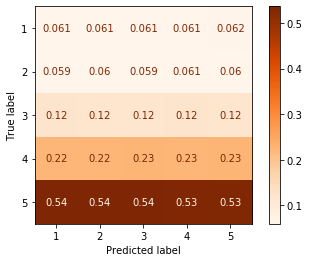

In [12]:
common.display_classifier_performance(baseline_classifier, test_as_vec, test_targets)

## Performance measure row schema

In [14]:
def perf_row(classifier, classifier_type, sampling, representation, preprocessing, fit_prior, alpha):
    return {
        'sampling': sampling,
        'representation': representation,
        'preprocessing': preprocessing,
        'fit_prior': fit_prior,
        'alpha': alpha,
        'score': common.get_score(classifier, test_as_vec, test_targets),
    }

In [18]:
results_df = pd.DataFrame.from_dict([
    perf_row(baseline_classifier, 'baseline', 'full', 'count', None, 'N/A', 'N/A')])
results_df

,sampling,representation,preprocessing,fit_prior,alpha,score
0,full,count,None,N/A,N/A,0.201048


## One multi-class combined classifier, exposed to all classes at once

In [34]:
for sampling in ['random_downsampling', 'full']:
    for representation in ['count', 'tf_idf']:
        for preprocessing in [None, 'stop_words']:
            for fit_prior in [False, True]:
                for alpha in np.arange(0.1, 10., .1):
                    
                    if representation == 'tf_idf':
                        raise Exception('starczy tego dobrego')

                    train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
                        sampling, representation, preprocessing)

                    classifier = sklearn.naive_bayes.MultinomialNB(fit_prior=fit_prior, alpha=alpha)
                    classifier.fit(train_as_vec, train_targets)

                    results_df = results_df.append([
                            perf_row(
                                classifier, 'multiclass', sampling, representation, preprocessing, fit_prior, alpha)])

Exception: starczy tego dobrego

In [38]:
results_df.sort_values('score', ascending=False).head(25)

,sampling,representation,preprocessing,fit_prior,alpha,score
0,random_downsampling,count,None,True,2.3,0.467289
0,random_downsampling,count,None,True,2.2,0.467215
0,random_downsampling,count,None,True,2.4,0.467039
0,random_downsampling,count,None,True,1.8,0.466962
0,random_downsampling,count,None,True,2.1,0.466958
0,random_downsampling,count,None,True,1.9,0.466894
0,random_downsampling,count,None,False,2.2,0.466880
0,random_downsampling,count,None,False,2.3,0.466863
0,random_downsampling,count,None,True,2,0.466794
0,random_downsampling,count,None,True,2,0.466794
